In [ ]:
#   UNIVARIATE LINEAR REGRESSION
#   TO PREDICT PROFIT OF A BIKE SHARING COMPANY
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

import numpy as np #scientific computing
import pandas as pd  #to manage data
import seaborn as sns #for plotting and plot styling
plt.rcParams['figure.figsize'] = (12, 8)

data = pd.read_csv('bike_sharing_data.txt')
data.head() #to get first five entries





,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# To get data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


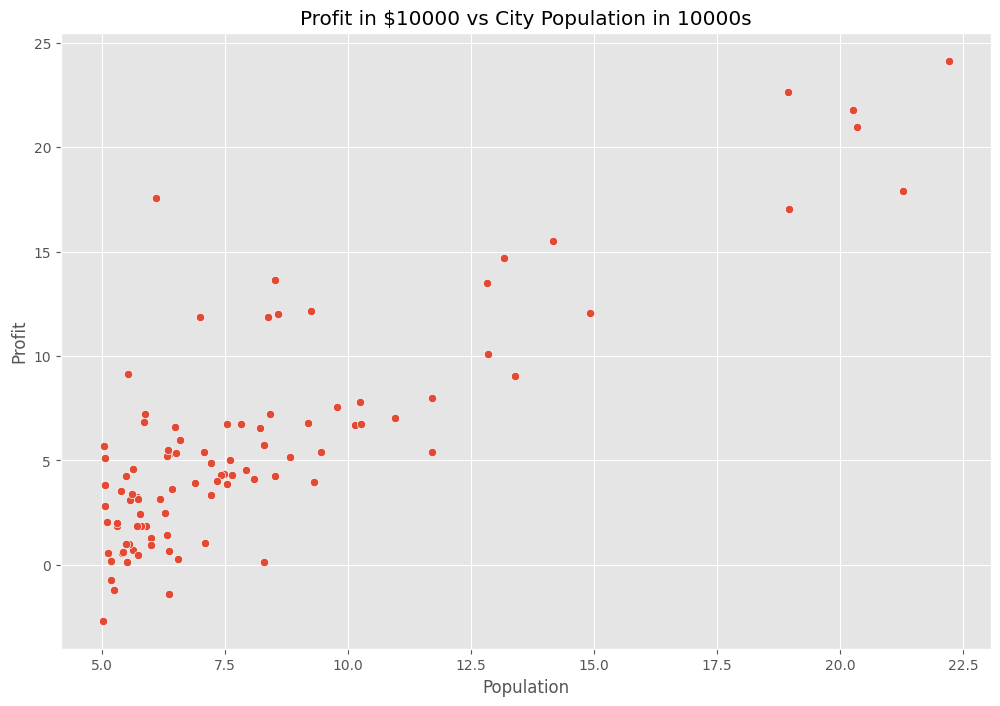

In [ ]:
# PLOTTING data
ax = sns.scatterplot(x="Population", y="Profit", data=data)
ax.set_title("Profit in $10000 vs City Population in 10000s");

In [ ]:
# COMPUTING COST FUNCTION J(THETA)
def cost_function(X, y, theta) :
    m = len(y)
    y_pred = X.dot(theta)
    error = (y_pred - y) ** 2

    return 1/(2*m) * np.sum(error)

In [ ]:
m = data.Population.values.size
X = np.append(np.ones((m,1)), data.Population.values.reshape(m,1), axis=1)
y = data.Profit.values.reshape(m,1)
theta = np.zeros((2,1))

cost_function (X, y, theta)

32.072733877455676

In [ ]:
# GRADIENT DESCENT FOR MINIMISING COST FUNCTION
def gradient_descent(X, y ,theta, alpha, iterations) :
    m = len(y)
    costs = []
    for i in range(iterations):
        y_pred = X.dot(theta)
        error = np.dot(X.transpose(), (y_pred - y))
        theta -= alpha * 1/m * error
        costs.append(cost_function(X, y, theta))
    return theta, costs

In [ ]:
theta, costs = gradient_descent(X, y, theta, alpha=0.01, iterations=2000)
print("h(x) = {} + {}x1".format(str(round(theta[0,0], 2)),
                               str(round(theta[1,0],2))))

h(x) = -3.79 + 1.18x1


In [ ]:
# VISUALISING COST FUNCTION
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
theta_0 = np.linspace(-10, 10, 100)
theta_1 = np.linspace(-1, 4, 100)

cost_values = np.zeros((len(theta_0), len(theta_1)))

for i in range (len(theta_0)) :
    for j in range(len(theta_1)) :
        t = np.array([theta_0[i], theta_1[j]])
        cost_values[i,j] = cost_function(X, y, t)

<function matplotlib.pyplot.show(close=None, block=None)>

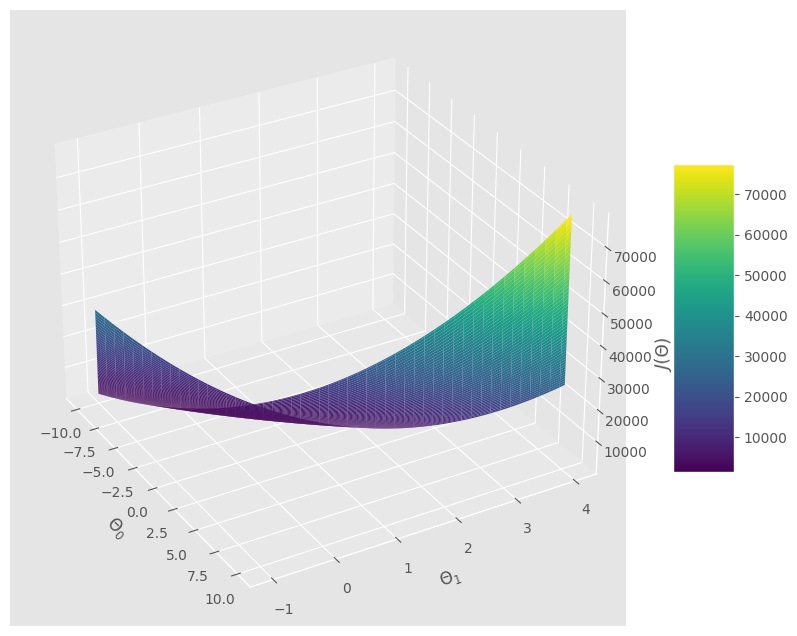

In [ ]:
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(projection = '3d')

surf = ax.plot_surface(theta_0, theta_1, cost_values, cmap = 'viridis' )
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.xlabel("$\Theta_0$")
plt.ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")
ax.view_init(30,330)

plt.show

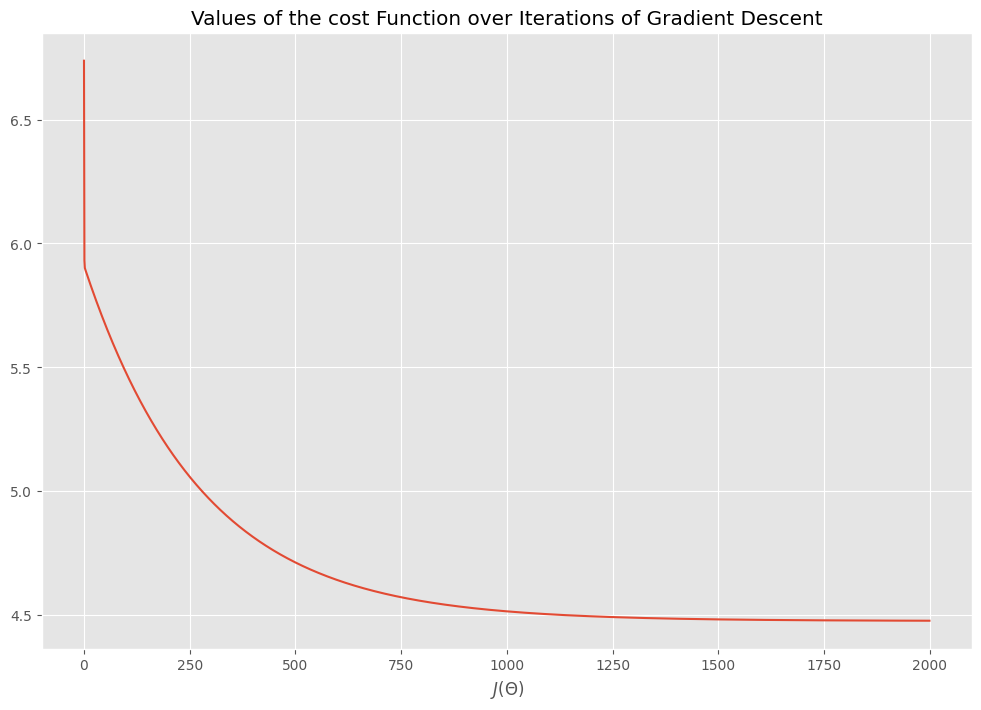

In [ ]:
# PLOTTING HE CONVERGENCE
plt.plot(costs)
plt.xlabel("Iterations")
plt.xlabel("$J(\Theta)$")
plt.title("Values of the cost Function over Iterations of Gradient Descent");

In [ ]:
#   TRAINING DATA WITH LINEAR REGRESSION FITS
theta.shape

(2, 1)

Text(0.5, 1.0, 'Linear Regression')

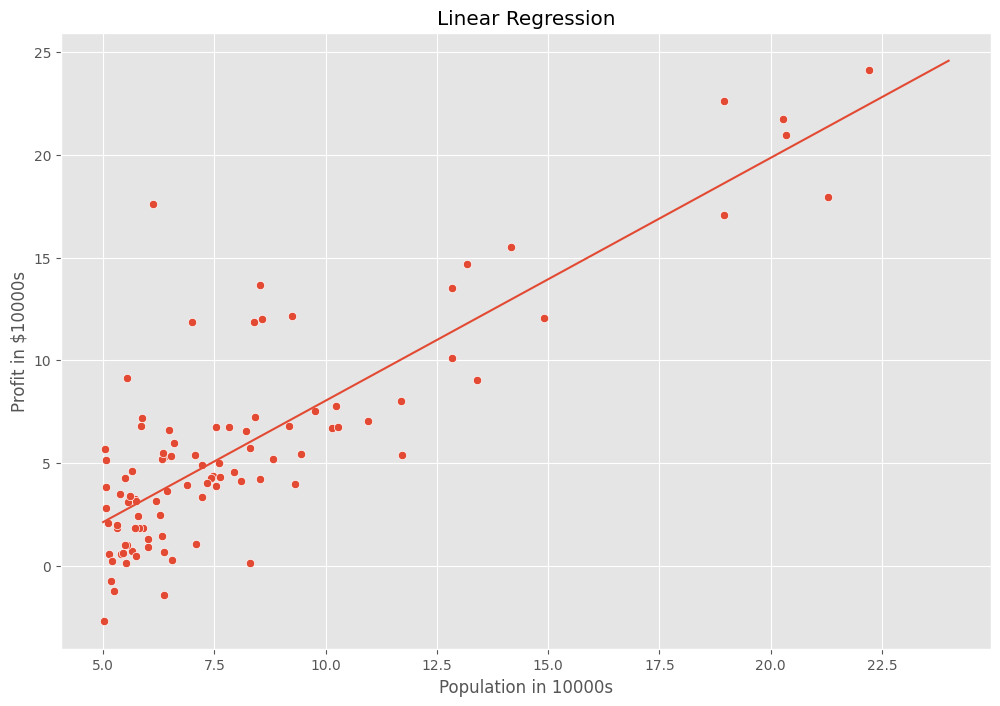

In [ ]:
theta = np.squeeze(theta)
sns.scatterplot(x="Population", y="Profit", data=data)

x_value = [x for x in range(5,25) ]
y_value = [(x*theta[1] + theta[0]) for x in x_value]

sns.lineplot(x= x_value, y = y_value)
plt.xlabel("Population in 10000s")
plt.ylabel("Profit in $10000s")
plt.title("Linear Regression")

In [ ]:
#    INFERENCE USING OPTIMISED THETA VALUES
def predict(x, theta):
    y_pred = np.dot(theta.transpose(), x)
    return y_pred

In [ ]:
y_pred_1  = predict(np.array([1,4]), theta) * 10000
print("for a population of 40,000 people, the model predicts a profit of $" + str(round(y_pred_1, 0)))

for a population of 40,000 people, the model predicts a profit of $9408.0
